In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


# Gathering Data

In [2]:
#read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#tweet image predictions download
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

#now create the file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)
    
img_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#because i don't have a twitter account, i copied and pasted this from the twitter-api.py file that udacity gave me

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Gy991pIEBfjo7tKsgzJGpZPsk'
consumer_secret = 'tXYwODRcyp6Blns1Q8IN4dosfYWs1jnh9Z1SLRrXKJpzXCCluf'
access_token = '1143825577503277056-WJBUzKNf0jpTdsYG7TCvECEqfg9ScU'
access_secret = 'tY7RhANKeyx6KlZfgbJhRmPvufaDp7UI5DqxBQQBvqbGb'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [6]:
#Then read this .txt file 
#line by line into a pandas DataFrame
#with (at minimum) tweet ID, 
#retweet count, and favorite count. 

list_tweet_df = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        list_tweet_df.append({'id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })
#creating the df with the only specific columns (the required ones)
tweets_df = pd.DataFrame(list_tweet_df, columns = ['id', 'retweet_count', 'favorite_count'])


In [7]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8129,37419
1,892177421306343426,6024,32149
2,891815181378084864,3987,24247
3,891689557279858688,8292,40723
4,891327558926688256,8983,38954


In [8]:
#making new copies of all the df
twitter_new = twitter_archive.copy()
img_new = img_prediction.copy()
tweets_new = tweets_df.copy()

# Assessing Data

In [9]:
twitter_new.info()
twitter_new.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
465,817181837579653120,NaN,NaN,2017-01-06 01:31:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper with squeaky hi...,8.159661e+17,4.196984e+09,2017-01-02 17:00:46 +0000,https://twitter.com/dog_rates/status/815966073...,13,10,None,None,None,pupper,None
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1947,673700254269775872,NaN,NaN,2015-12-07 03:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Large blue dog here. Cool shades. Flipping us ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673700254...,3,10,None,None,None,None,None


In [10]:
twitter_new.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
an             7
Daisy          7
Bailey         7
Toby           7
Dave           6
Milo           6
Stanley        6
Bella          6
Koda           6
Oscar          6
Rusty          6
Leo            6
Jack           6
Scout          6
Jax            6
Sunny          5
            ... 
Snickers       1
Adele          1
Butters        1
Remus          1
Marvin         1
Newt           1
Sephie         1
Bertson        1
Gòrdón         1
Anthony        1
Alexander      1
Tobi           1
Stu            1
Shiloh         1
Trip           1
Kevon          1
Tater          1
Monkey         1
Lugan          1
Severus        1
Odin           1
Cupid          1
Darby          1
Daniel         1
Clybe          1
Karma          1
Sage           1
Jed           

In [11]:
twitter_new.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [12]:
twitter_new.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_new.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
img_new.info()
img_new.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
125,668248472370458624,https://pbs.twimg.com/media/CUYYcMfXAAAixe7.jpg,1,Chihuahua,0.734547,True,miniature_pinscher,0.068294,True,toy_terrier,0.046367,True
1334,757741869644341248,https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg,1,skunk,0.609715,False,Old_English_sheepdog,0.128899,True,Siberian_husky,0.019076,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
1311,754449512966619136,https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg,1,beagle,0.858513,True,basset,0.076012,True,English_foxhound,0.016246,True


In [15]:
tweets_new.info()
tweets_new.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
id                2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


,id,retweet_count,favorite_count
1791,676776431406465024,2079,5081
883,758405701903519748,2037,5399
290,836380477523124226,3120,15235
2025,671518598289059840,292,951
493,812372279581671427,3947,14387


### quality issues

* change the misspelled dog names (for instance if it is 'the' or 'a' etc to 'None'. This is so that I can remove these rows later.
* rename id to tweet_id so that it can be merged later (in tweets_new)
* remove the _ between the words and make it a space instead (img_new dataframe).
* there are 2075 entries in the img_new table and 2356 in the twitter_new table
* 181 records of retweeted dogs. these must be removed
* delete the rows that have the dog name None
* rating_numerator has very large numbers that seem very much like outliers
* rating_denominator has values that are not 10 which should be impossible

### tidiness issues
* date and time column in twitter_new df needs to change from an object format to a date and time format
* doggo, puppo, pupper and floofer columns in twitter_new table should be merged into one column named 'stage'

# Cleaning

In [16]:
#quality: * change the misspelled dog names (for instance if it is 'the' or 'a' etc to 'none'.
#here i am changing all of the names that are like 'a' or 'the' etc to 'None'
twitter_new['name'].replace('a', 'None', inplace=True)
twitter_new['name'].replace('Bo', 'None', inplace=True)
twitter_new['name'].replace('the', 'None', inplace=True)
twitter_new['name'].replace('an', 'None', inplace=True)
twitter_new['name'].replace('by', 'None', inplace=True)
twitter_new['name'].replace('this', 'None', inplace=True)
twitter_new['name'].replace('all', 'None', inplace=True)
twitter_new['name'].replace('infuriating', 'None', inplace=True)
twitter_new['name'].replace('very', 'None', inplace=True)
twitter_new['name'].replace('old', 'None', inplace=True)
twitter_new['name'].replace('one', 'None', inplace=True)
twitter_new['name'].replace('not', 'None', inplace=True)
twitter_new['name'].replace('mad', 'None', inplace=True)
twitter_new['name'].replace('my', 'None', inplace=True)


In [17]:
#test: 
twitter_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
#quality: rename id to tweet_id so that it can be merged later (in tweets_new)
tweets_new.rename(columns={'id':'tweet_id'}, inplace=True)

In [19]:
#test:
tweets_new.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8129,37419
1,892177421306343426,6024,32149
2,891815181378084864,3987,24247
3,891689557279858688,8292,40723
4,891327558926688256,8983,38954


In [20]:
img_new.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
#quality: remove the _ between the words and make it a space instead. (img_new dataframe)

img_new['p1'] = img_new['p1'].str.replace("_"," ")
img_new['p2'] = img_new['p2'].str.replace("_"," ")
img_new['p3'] = img_new['p3'].str.replace("_"," ")

In [22]:
#test: 
img_new.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
#quality: * there are 2075 entries in the img_new table and 2356 in the twitter_new table
twitter_new = twitter_new[twitter_new.tweet_id.isin(img_new.tweet_id)]


In [24]:
#test
twitter_new.info()
img_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: float64(4), int64(3), objec

In [25]:
#quality: 181 records of retweeted dogs. these must be removed
#as the retweeted rows are the ones that do not have the null value,
#this means that I need to delete all rows that are not null (or keep the rows that are null)

twitter_new = twitter_new[twitter_new.retweeted_status_user_id.isnull()]


In [26]:
#test
twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

In [27]:
#delete the rows that have the dog name None in twitter_new

twitter_new.drop(twitter_new[twitter_new['name']== 'None'].index, inplace=True)

In [28]:
#test
twitter_new.name.value_counts()

Charlie         11
Oliver          10
Lucy            10
Cooper          10
Penny            9
Tucker           9
Winston          8
Sadie            8
Toby             7
Daisy            7
Lola             7
Stanley          6
Bella            6
Koda             6
Jax              6
Chester          5
Buddy            5
Rusty            5
Milo             5
Dave             5
Scout            5
Louis            5
Bailey           5
Oscar            5
Leo              5
Bentley          4
Clark            4
Reggie           4
Jerry            4
Phil             4
                ..
Monkey           1
Lugan            1
Aiden            1
Odin             1
Cupid            1
Darby            1
Daniel           1
Devón            1
Shadoe           1
Fynn             1
Baron            1
Apollo           1
Vince            1
Edgar            1
Lupe             1
Hall             1
Gert             1
Aja              1
unacceptable     1
Gerbald          1
Hubertson        1
Bauer       

In [29]:
#quality rating_numerator has very large numbers that seem very much like outliers
#therefore I will be deleting all of the numerator numbers that are higher than 100.

twitter_new.drop(twitter_new[twitter_new['rating_numerator'] > 100].index, inplace=True)



In [30]:
#test
twitter_new.rating_numerator.value_counts()

12    330
11    301
10    276
13    176
9     101
8      71
7      33
6      17
14     17
5      14
3      10
4       5
2       4
50      1
24      1
27      1
75      1
Name: rating_numerator, dtype: int64

In [31]:
#quality: rating_denominator has values that are not 10 which should be impossible
# this is why i will be dropping all of the rows that do not have a denominator
# of 10

twitter_new.drop(twitter_new[twitter_new['rating_denominator'] != 10].index, inplace=True)



In [32]:
#test
twitter_new.rating_denominator.value_counts()

10    1356
Name: rating_denominator, dtype: int64

In [33]:
#tidiness issues: date and time column in twitter_new df needs to change from an object format to a date and time format

twitter_new['timestamp'] = pd.to_datetime(twitter_new['timestamp'])


In [34]:
#test
twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 2326
Data columns (total 17 columns):
tweet_id                      1356 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1356 non-null datetime64[ns]
source                        1356 non-null object
text                          1356 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1356 non-null object
rating_numerator              1356 non-null int64
rating_denominator            1356 non-null int64
name                          1356 non-null object
doggo                         1356 non-null object
floofer                       1356 non-null object
pupper                        1356 non-null object
puppo                         1356 non-null object
dtypes: datetime64[ns](1), float

In [35]:
#tidiness: doggo, puppo, pupper and floofer columns in twitter_new table should be merged into one column named 'stage'
twitter_new['stage'] = twitter_new[twitter_new.columns[13:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)


In [36]:
#test
twitter_new.stage.value_counts()

None,None,None,None       1178
None,None,pupper,None      117
doggo,None,None,None        36
None,None,None,puppo        15
doggo,None,pupper,None       5
None,floofer,None,None       5
Name: stage, dtype: int64

# Merging dataframes

In [41]:
twitter_df_master1 = pd.merge(twitter_new, img_new, on='tweet_id', how='left')


In [42]:
twitter_df_master = pd.merge(twitter_df_master1, tweets_new, on='tweet_id', how='left')


In [49]:
twitter_df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 1355
Data columns (total 31 columns):
tweet_id                      1356 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1356 non-null datetime64[ns]
source                        1356 non-null object
text                          1356 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1356 non-null object
rating_numerator              1356 non-null int64
rating_denominator            1356 non-null int64
name                          1356 non-null object
doggo                         1356 non-null object
floofer                       1356 non-null object
pupper                        1356 non-null object
puppo                         1356 non-null object
stage                         13

# Storing

In [46]:
#saving the dataframes as csv files:
twitter_df_master.to_csv('twitter_archive_master.csv')
twitter_new.to_csv('twitter_archive.csv')
img_new.to_csv('image_predictions.csv')
tweets_new.to_csv('tweets_information.csv')

# Analyzing and Visualizing
At least three (3) insights and one (1) visualization must be produced.

In [47]:
twitter_df_master.stage.value_counts()

None,None,None,None       1178
None,None,pupper,None      117
doggo,None,None,None        36
None,None,None,puppo        15
doggo,None,pupper,None       5
None,floofer,None,None       5
Name: stage, dtype: int64

This is my first insight. Looking above you can see that 1178 times not one of the dog categories was given meaning that the dogs must have been a different type of dog or so. Other than that 5 times, a dog was both a doggo and pupper which is a little strange.

In [48]:
twitter_df_master.rating_numerator.value_counts()

12    330
11    301
10    276
13    176
9     101
8      71
7      32
14     17
6      17
5      14
3      10
4       5
2       4
75      1
27      1
Name: rating_numerator, dtype: int64

This is my second insight. Looking above, you can see how the numerator values vary from 2 to 75. This firstly means that not one single dog was given the rating of 1 out of 10 which is definetely a sign that all dogs are somewhat cute :)

Also, the most of the people that rated the dogs (a total of 330 people) gave the dogs a rating of 12 out of 10 which means that most of the people thought that the dogs tweeted were extremely cute. This is also because only 4 individuals rated dogs 2/10.

In [50]:
twitter_df_master.p1.value_counts()

golden retriever                  91
Pembroke                          64
Labrador retriever                64
Chihuahua                         58
pug                               39
chow                              32
toy poodle                        27
Pomeranian                        26
Samoyed                           23
French bulldog                    22
malamute                          22
cocker spaniel                    19
Siberian husky                    18
Chesapeake Bay retriever          17
Staffordshire bullterrier         16
miniature pinscher                16
Shih-Tzu                          15
seat belt                         15
Shetland sheepdog                 14
German shepherd                   14
Cardigan                          14
beagle                            13
Eskimo dog                        12
teddy                             11
Italian greyhound                 11
Pekinese                          11
vizsla                            10
b

Text(0.5,0,'Total Number of Dogs That Have That Breed')

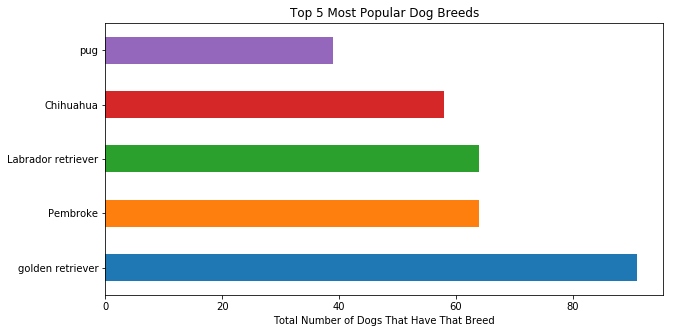

In [85]:
twitter_df_master.p1.value_counts()[0:5].plot('barh', figsize=(10,5))

plt.title('Top 5 Most Popular Dog Breeds')
plt.xlabel('Total Number of Dogs That Have That Breed')

This is the third insight. Looking above you can see that the most popular dog that is tweeted about is a golden retriever as 91 people tweeted about their dog that was a golden retriever. 

There are also many dogs that are only tweeted about once for instance the japanese spaniel. Something that I noticed was that as I was reading the names I came across many animals that werent even dogs such as a snail and meerkat. 

Text(0,0.5,'Total Number Of Dogs With That Name')

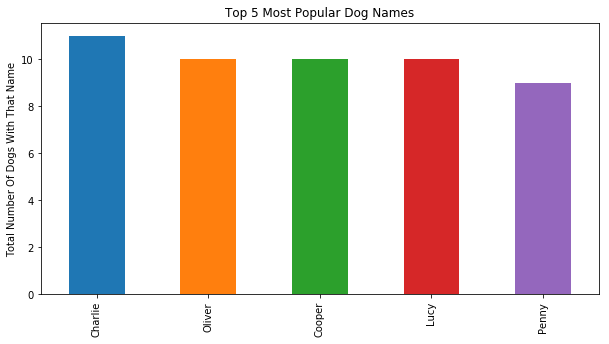

In [84]:
twitter_df_master.name.value_counts()[0:5].plot('bar', figsize=(10,5))

plt.title('Top 5 Most Popular Dog Names')
plt.ylabel('Total Number Of Dogs With That Name')